In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import datasets

# 1. REGRESSION DNN

### - Membuat Data


In [2]:
x = np.array([3,4,5,6,7,8], dtype=float)
y = np.array([1,3,5,7,9,11], dtype=float)

# SQUENTIAL MODEL


In [4]:
# arsitektur
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

In [6]:
# configurasi model
model.compile(optimizer='sgd', loss='mean_squared_error')

In [42]:
# Latih Model
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss') < 1e-4):
            self.model.stop_training = True

cb = myCallback()

model.fit(x,y, epochs=400, steps_per_epoch=19, callbacks=cb)

Epoch 1/400


ValueError: in user code:

    File "c:\Users\D I D I\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\D I D I\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\D I D I\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\D I D I\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\D I D I\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\D I D I\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 250, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_5" "                 f"(type Sequential).
    
    Input 0 of layer "dense_20" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (1,)
    
    Call arguments received by layer "sequential_5" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(1,), dtype=float32)
      • training=True
      • mask=None


# Load Data ('data fashion_mnist')

In [51]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()


In [52]:
print(y_train[0])
print(x_train.shape)
print(x_test.shape)

9
(60000, 28, 28)
(10000, 28, 28)


In [53]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


# Menampilkan 

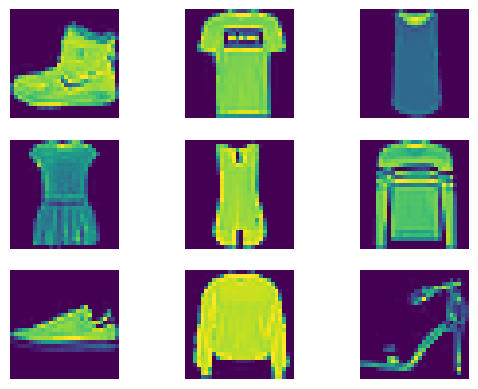

In [63]:
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

In [68]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [69]:
# Membuat Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_dim=784),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 512)               401920    
                                                                 
 dense_48 (Dense)            (None, 256)               131328    
                                                                 
 dense_49 (Dense)            (None, 128)               32896     
                                                                 
 dense_50 (Dense)            (None, 64)                8256      
                                                                 
 dense_51 (Dense)            (None, 10)                650       
                                                                 
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [71]:
# Mentraining Model dengan history
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=[x_test, y_test])

Epoch 1/10
469/469 [==============================] - 8s 14ms/step - loss: 0.5011 - accuracy: 0.8218 - val_loss: 0.4184 - val_accuracy: 0.8457
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 0.3597 - accuracy: 0.8688 - val_loss: 0.3759 - val_accuracy: 0.8649
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.3216 - accuracy: 0.8814 - val_loss: 0.3623 - val_accuracy: 0.8690
Epoch 4/10
469/469 [==============================] - 6s 13ms/step - loss: 0.3004 - accuracy: 0.8894 - val_loss: 0.3380 - val_accuracy: 0.8787
Epoch 5/10
469/469 [==============================] - 7s 14ms/step - loss: 0.2829 - accuracy: 0.8947 - val_loss: 0.3369 - val_accuracy: 0.8772
Epoch 6/10
469/469 [==============================] - 7s 15ms/step - loss: 0.2685 - accuracy: 0.8998 - val_loss: 0.3474 - val_accuracy: 0.8753
Epoch 7/10
469/469 [==============================] - 8s 18ms/step - loss: 0.2596 - accuracy: 0.9025 - val_loss: 0.3406 - val_accuracy: 0.8769

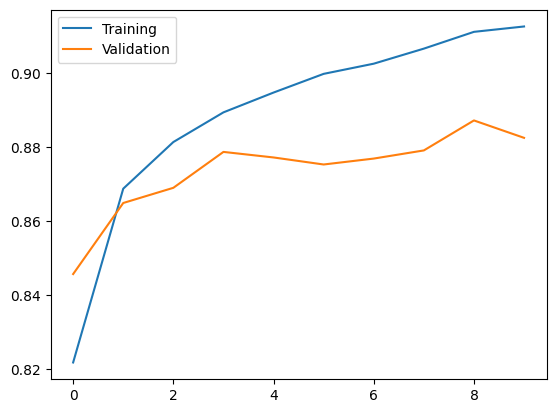

In [73]:
nilai_x = range(len(history.history['accuracy']))
plt.plot(nilai_x, history.history['accuracy'], label='Training')
plt.plot(nilai_x, history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

In [76]:
# Evaluasi model
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3313 - accuracy: 0.8825


[0.3312612771987915, 0.8824999928474426]

In [78]:
# Save model
model.save('model/modelSederhana.h5')
model_saved = tf.keras.models.load_model('model/modelSederhana.h5')
model_saved.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 512)               401920    
                                                                 
 dense_48 (Dense)            (None, 256)               131328    
                                                                 
 dense_49 (Dense)            (None, 128)               32896     
                                                                 
 dense_50 (Dense)            (None, 64)                8256      
                                                                 
 dense_51 (Dense)            (None, 10)                650       
                                                                 
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
_________________________________________________________________
